In [1]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 

In [2]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### Read all Data
Read train data and the prediction data

In [3]:
data = pd.read_csv("train.csv")
pd.set_option('display.max_columns',100)
#data_predict = pd.read_csv("covtype.data" , header = None)
#print ( data_predict.shape , data.shape)

### Data Split

Split the data into train , develop , predict . All EDA will be done on the train data.

In [4]:

X = np.array(data.as_matrix(columns=data.columns[1:55]))
Y = np.array(data["Cover_Type"].tolist())
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]
train_df = data.iloc[shuffle,:].iloc[:12000 , :]
print('data shape: ', X.shape)
print('label shape:', Y.shape)
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]

data shape:  (15120, 54)
label shape: (15120,)


/Users/jeff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


### EDA

#### Step 1 : Describe the train data

In [5]:
display(train_df.describe())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,7542.369500,2748.158250,156.723833,16.571750,226.658000,51.076250,1709.164083,212.585917,218.818333,135.025000,1515.053417,0.237167,0.033417,0.419833,0.309583,0.023667,0.040167,0.063167,0.056500,0.011417,0.044000,0.0,0.000083,0.000583,0.142583,0.026583,0.015250,0.031667,0.011417,0.0,0.007333,0.040250,0.004500,0.00275,0.009667,0.001167,0.023333,0.048833,0.017000,0.000083,0.003417,0.001000,0.000583,0.083750,0.048500,0.022167,0.044833,0.042167,0.001500,0.006417,0.000583,0.001917,0.048250,0.043167,0.029750,3.992500
std,4361.017596,417.032084,110.275273,8.480704,209.457972,61.348496,1330.003220,30.603995,22.868153,45.989797,1106.480545,0.425363,0.179729,0.493552,0.462341,0.152015,0.196358,0.243273,0.230894,0.106242,0.205104,0.0,0.009129,0.024146,0.349662,0.160869,0.122551,0.175118,0.106242,0.0,0.085324,0.196553,0.066934,0.05237,0.097847,0.034138,0.150966,0.215528,0.129276,0.009129,0.058355,0.031608,0.024146,0.277024,0.214829,0.147231,0.206947,0.200978,0.038702,0.079850,0.024146,0.043740,0.214303,0.203241,0.169904,1.996775
min,2.000000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3775.750000,2376.000000,64.000000,10.000000,67.000000,5.000000,759.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7532.500000,2750.000000,125.000000,15.000000,180.000000,32.000000,1310.000000,220.000000,222.000000,138.000000,1254.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Following is what we observe:
1. All fields are continous or binary. There are no text fields 
2. Soil_Type fields are binary
3. Wilderness Area fields are binary
4. Following are the fields which are continous : 'Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points'

We create the scatter plots for the continous fields

#### Step 2 : Scatter plot for continous fields

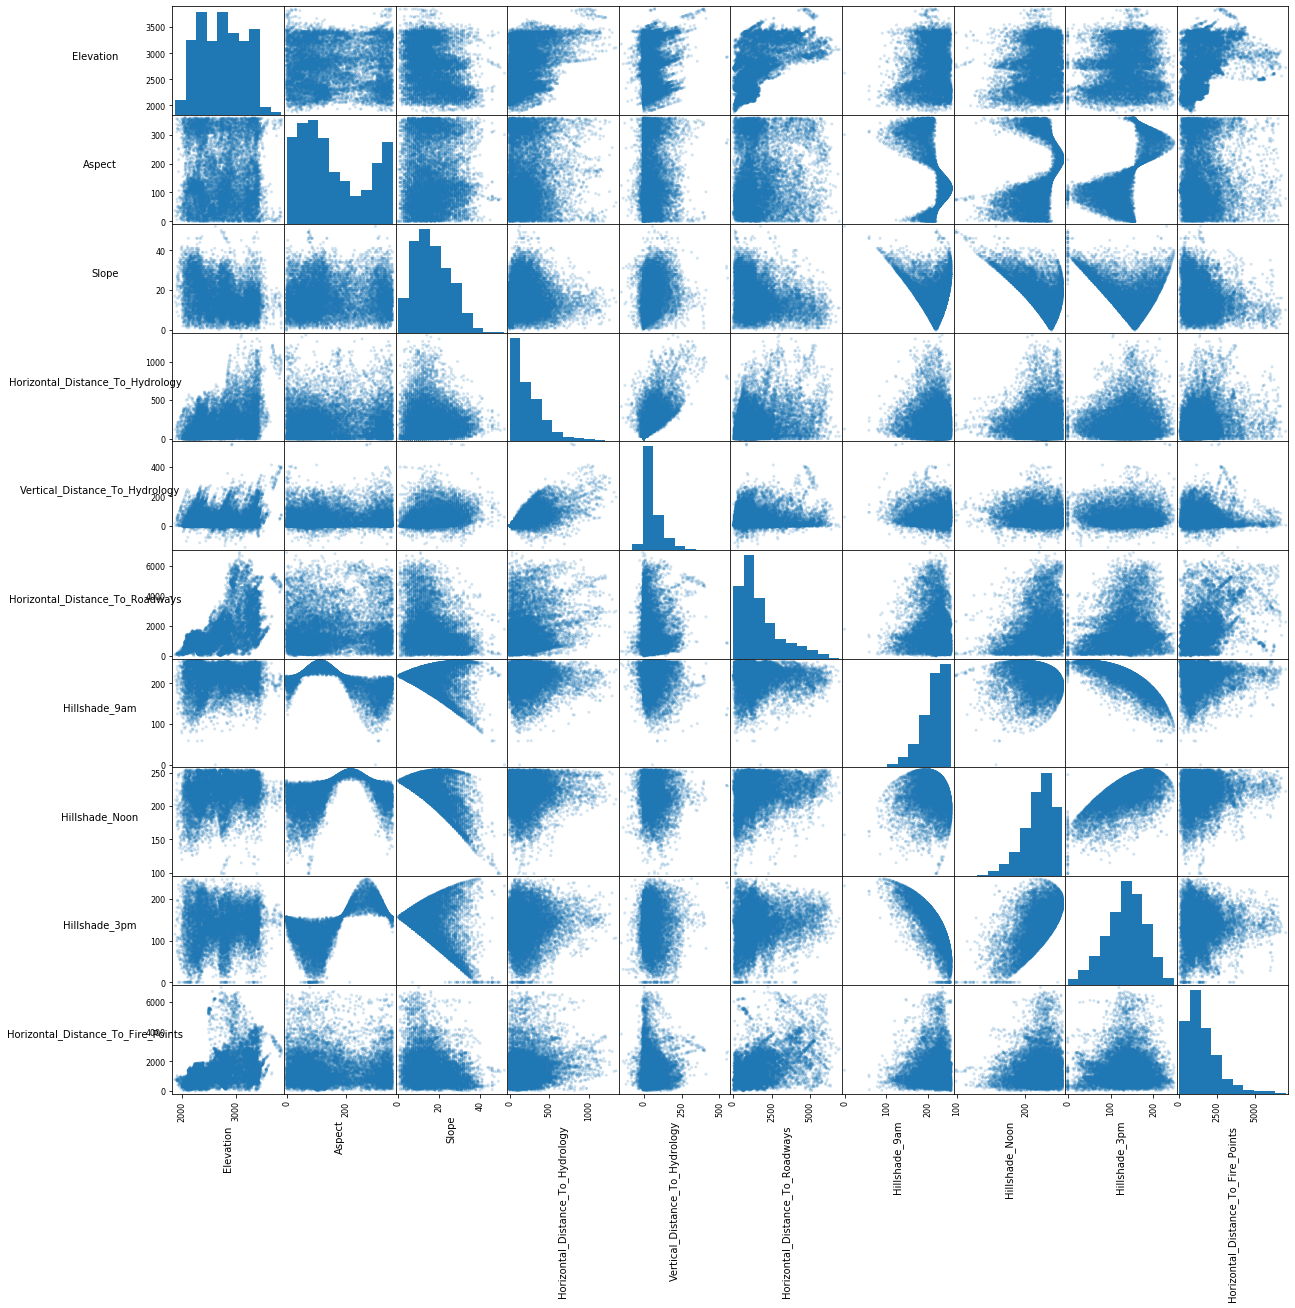

In [6]:
plot_temp = train_df[['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]
axs = pd.plotting.scatter_matrix(plot_temp,alpha=0.2,figsize=(20, 20))
n = len(plot_temp.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
plt.show()

Followin are the observations :
1. The graph shows that there is a correlation between Hillshade_3PM , Hillshade_9AM , Hillshade_Noon , although it is not linear
2. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Aspect , although it is not linear.
3. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Slope , although it is not linear.
4. Log of Horizontal_Distance_To_Hydrology , Horizontal_Distance_To_Fire_Points , Horizontal_Distance_To_Roadways

#### Step 3 : Count zero and NA values

In [7]:
def count_non_zero_for_a_column(train_df, column_name):
    count_obj = train_df.apply(lambda x: True if x[column_name] == 0 else False , axis=1)
    no_rows = len(count_obj[count_obj == True].index)
    print ( column_name , ' : ' , no_rows )
print ("\033[1m" , 'Count of zero rows by column :' , "\033[0;0m")
column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
for column_name in column_list:
    count_non_zero_for_a_column(train_df, column_name)
print ("\033[1m" , 'Count of NA rows by column :' , "\033[0;0m")    
print (train_df.count(axis = 0)   ) 

 Count of zero rows by column : 
Elevation  :  0
Aspect  :  81
Slope  :  4
Horizontal_Distance_To_Hydrology  :  1250
Vertical_Distance_To_Hydrology  :  1498
Horizontal_Distance_To_Roadways  :  2
Hillshade_9am  :  1
Hillshade_Noon  :  0
Hillshade_3pm  :  68
Horizontal_Distance_To_Fire_Points  :  2
 Count of NA rows by column : 
Id                                    12000
Elevation                             12000
Aspect                                12000
Slope                                 12000
Horizontal_Distance_To_Hydrology      12000
Vertical_Distance_To_Hydrology        12000
Horizontal_Distance_To_Roadways       12000
Hillshade_9am                         12000
Hillshade_Noon                        12000
Hillshade_3pm                         12000
Horizontal_Distance_To_Fire_Points    12000
Wilderness_Area1                      12000
Wilderness_Area2                      12000
Wilderness_Area3                      12000
Wilderness_Area4                      12000
Soil_Type1 

Following are what we observe :
1. There are no NA values in any column
2. Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology are zero for more than 10% of the data points.
    

### Solution Approaches

#### Approach 1 
1. Without transformation fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
2. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 2 
1. Tranform the train data continous features with Min Max Scaler
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 3 
1. Tranform the train data continous features with Robust Scaler
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 4 
1. Tranform the train data using PCA
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 5 
1. Tranform the train data continous features taking log for relevant fields
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

### Reusable Algorithm Code

In [8]:
warnings.filterwarnings(action='ignore')  

#### Logistic Regression

In [9]:
def classify_logistic_regression(train_data , train_labels , dev_data , dev_labels ):
    print ( "\033[1m" ,  "Logistic Regression " , "\033[0;0m" )
    C_values= { 'C' : [ 0.01, 0.05 , 0.1,  1.0,10.0]}
    grd_model = GridSearchCV( LogisticRegression(penalty='elasticnet', solver='saga' , l1_ratio =0),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Decission Tree

In [10]:
def classify_decision_tree (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Decision Tree " , "\033[0;0m" )
    C_values= { 'max_depth' : [20,25 , 35,40,50 , 60 , 80] , 'random_state' : [ 0 ,1 , 2]}
    grd_model = GridSearchCV( DecisionTreeClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Random Forest

In [11]:
def classify_random_forest (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Random Forest " , "\033[0;0m" )
    C_values= { 'max_depth' : [5, 10 , 15 ] , 'n_estimators' : [ 20, 30 , 40 ,50 , 200 ] , 'min_samples_leaf': [10,50,100,200,500]  }
    grd_model = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model 

#### KNN

In [12]:
def classify_KNN (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "K Nearest Neighbour" , "\033[0;0m" )
    C_values = { 'n_neighbors' : [1, 3, 5, 7, 9] }
    grd_model = GridSearchCV( KNeighborsClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Gradient Boosting

In [13]:
def classify_gradient_boosting(train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Gradient Boosting" , "\033[0;0m" )
    C_values= { 'max_depth' : [20,25 , 35,40,50 , 60 , 80] , 'n_estimators' : [ 10, 20 , 30 , 40 ,50 ,60]}
    grd_model = GridSearchCV( GradientBoostingClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Scale continous variables

In [14]:
def fit_all_data_scalers(column_list , scaler_type ,  train_data , test_data , dev_data ):
    for column_name in column_list:
        if scaler_type == 'MinMax' :
            scaler = MinMaxScaler(feature_range=(0, 1))
        if scaler_type == 'Robust':
            scaler = RobustScaler()
        else:
            scaler = StandardScaler()
        column_index = train_df.columns.get_loc(column_name) - 1
        train_data[:,column_index] = scaler.fit_transform(train_data[:,column_index].reshape(-1,1)).reshape(-1)
        test_data[:,column_index] =  (scaler.transform(test_data[:,column_index].reshape(-1,1)).reshape(-1))
        dev_data[:,column_index] =  (scaler.transform(dev_data[:,column_index].reshape(-1,1)).reshape(-1))
    return train_data , test_data , dev_data 

#### Run all algorithms

In [15]:
def run_all_algorithms (train_data , train_labels , dev_data , dev_labels ):
    # Run KNN
    grd_model_knn = classify_KNN(train_data , train_labels , dev_data , dev_labels ) 
    predicted = grd_model_knn.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))
    # Run Logistic Regression
    grd_model_lr = classify_logistic_regression(train_data , train_labels , dev_data , dev_labels ) 
    predicted = grd_model_lr.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))   
    # Run Decission Tree
    grd_model_dt = classify_decision_tree(train_data , train_labels , dev_data , dev_labels )  
    predicted = grd_model_dt.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))
    # Run Random Forest
    grd_model_rf = classify_random_forest(train_data , train_labels , dev_data , dev_labels )
    predicted = grd_model_rf.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))  
    return grd_model_knn , grd_model_lr , grd_model_dt , grd_model_rf 

 ### Approach 1

In [16]:
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]

Run all algorithms and check accuracy on dev data . Also check the confusion matrix and accuracy per class. Validate  accuracy on test data.

In [17]:
grd_model_knn_1 , grd_model_lr_1 , grd_model_dt_1 ,   grd_model_rf_1    = run_all_algorithms (train_data , train_labels , dev_data , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.8619999999999999
Classification Report :
              precision    recall  f1-score   support

           1       0.71      0.76      0.73       127
           2       0.65      0.77      0.70       129
           3       0.82      0.89      0.85       118
           4       0.98      0.92      0.95       151
           5       0.96      0.88      0.92       153
           6       0.90      0.84      0.87       140
           7       1.00      0.93      0.97       182

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.87      0.86      0.87      1000

Confusion Matrix :
[[ 97  30   0   0   0   0   0]
 [ 25  99   2   0   3   0   0]
 [  0   4 105   2   1   6   0]
 [  0   0   6 139   0   6   0]
 [  3  13   2   0 134   1   0]
 [  1   6  13   1   1 118   0]
 [ 11   1   0   0   0   0 170]]
 Logistic Regression  
Best fit pa

The accuracy is highest in KNN followed by Random Forest. F1 score is low for Class 1 and 2 . Also from the confusion matrix it is clear that the algorithms are most confused between class 1 and 2 
We run the algorithms with the top 10 important features from decision tree

In [18]:
top_10_estimators = np.argsort(grd_model_dt_1.best_estimator_.feature_importances_)[::-1][0:10]
grd_model_knn_new , grd_model_lr_new , grd_model_dt_new ,  grd_model_rf_new = run_all_algorithms (train_data[:,top_10_estimators] , train_labels , dev_data[:,top_10_estimators] , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.8619999999999999
Classification Report :
              precision    recall  f1-score   support

           1       0.71      0.76      0.73       127
           2       0.65      0.77      0.70       129
           3       0.82      0.89      0.85       118
           4       0.98      0.92      0.95       151
           5       0.96      0.88      0.92       153
           6       0.90      0.84      0.87       140
           7       1.00      0.93      0.97       182

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.87      0.86      0.87      1000

Confusion Matrix :
[[ 97  30   0   0   0   0   0]
 [ 25  99   2   0   3   0   0]
 [  0   4 105   2   1   6   0]
 [  0   0   6 139   0   6   0]
 [  3  13   2   0 134   1   0]
 [  1   6  13   1   1 118   0]
 [ 11   1   0   0   0   0 170]]
 Logistic Regression  
Best fit pa

The accuracy for KNN remains the same while for all models the accuracy reduces. We predict on the train data for the following models :

1. KNN with all features
2. Random Forest with all features
3. KNN with the 10 features

In [19]:
print ( "\033[1m" ,  "KNN with test predictions all features : " , "\033[0;0m" )
predicted= grd_model_knn_1.predict(test_data)
print(metrics.f1_score(test_labels, predicted , average='micro')) 

print ( "\033[1m" ,  "Random Forest with test predictions all features : " , "\033[0;0m" )
predicted= grd_model_rf_1.predict(test_data)
print(metrics.f1_score(test_labels, predicted , average='micro')) 

print ( "\033[1m" ,  "KNN with test predictions with 10 important features : " , "\033[0;0m" )
predicted= grd_model_knn_new.predict(test_data[:,top_10_estimators])
print(metrics.f1_score(test_labels, predicted , average='micro')) 

 KNN with test predictions all features :  
0.8561320754716981
 Random Forest with test predictions all features :  
0.8179245283018868
 KNN with test predictions with 10 important features :  
0.8561320754716981


We get the highest accuracy for KNN

 ### Approach 2

Using min max scalar for the continous features

In [20]:
scaler_type = 'MinMax'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
grd_model_knn_2 , grd_model_lr_2 , grd_model_dt_2 , grd_model_rf_2   = run_all_algorithms (train_data_trans , train_labels , dev_data_trans , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.808
Classification Report :
              precision    recall  f1-score   support

           1       0.69      0.68      0.68       138
           2       0.61      0.74      0.67       125
           3       0.71      0.75      0.73       122
           4       0.91      0.92      0.91       140
           5       0.93      0.84      0.88       154
           6       0.82      0.76      0.79       143
           7       0.96      0.92      0.94       178

    accuracy                           0.81      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.82      0.81      0.81      1000

Confusion Matrix :
[[ 94  37   0   0   2   0   5]
 [ 24  93   3   0   4   0   1]
 [  0   4  91   8   2  17   0]
 [  0   0   7 129   0   4   0]
 [  5  12   6   0 129   2   0]
 [  0   7  21   5   2 108   0]
 [ 14   0   0   0   0   0 164]]
 Logistic Regression  
Best fit parameters :
{'

The accuracy drops with scaling the data

 ### Approach 3

Using robust scalar for the continous features

In [21]:
scaler_type = 'Robust'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
grd_model_knn_3 , grd_model_lr_3 , grd_model_dt_3 ,  grd_model_rf_3    = run_all_algorithms (train_data_trans , train_labels , dev_data_trans , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.81
Classification Report :
              precision    recall  f1-score   support

           1       0.65      0.67      0.66       133
           2       0.61      0.75      0.67       126
           3       0.71      0.76      0.73       120
           4       0.94      0.93      0.93       143
           5       0.93      0.84      0.88       154
           6       0.84      0.75      0.79       146
           7       0.96      0.92      0.94       178

    accuracy                           0.81      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.82      0.81      0.81      1000

Confusion Matrix :
[[ 89  37   0   0   2   0   5]
 [ 24  94   3   0   4   0   1]
 [  0   4  91   6   3  16   0]
 [  0   0   7 133   0   3   0]
 [  7  11   5   0 129   2   0]
 [  3   7  22   3   1 110   0]
 [ 14   0   0   0   0   0 164]]
 Logistic Regression  
Best fit parameters :
{'C

The accuracy drops with scaling the data

 ### Approach 4

Fit PCA on train data and fit model on the PCA

In [22]:
pca = PCA(n_components=50)
pca.fit(train_data)
df_pca = pd.DataFrame()
df_pca['K Principal Components'] = np.arange(start=1 , stop=51)
df_pca['Explained Variance'] = pd.Series(pca.explained_variance_ratio_)
df_pca['Cumulative Explained Variance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
display(df_pca)

,K Principal Components,Explained Variance,Cumulative Explained Variance
0,1,7.200415e-01,0.720041
1,2,2.280127e-01,0.948054
2,3,3.562850e-02,0.983683
3,4,1.094469e-02,0.994627
4,5,4.100554e-03,0.998728
5,6,6.498323e-04,0.999378
6,7,4.293233e-04,0.999807
7,8,1.794686e-04,0.999987
8,9,1.220659e-05,0.999999
9,10,8.152971e-07,1.000000


First 10 components explains 100% of the variance . Hence we fit the PCA for 10 components

In [23]:
pca = PCA(n_components=10)
pca.fit(train_data)
train_pca = pca.transform(train_data)
dev_pca = pca.transform(dev_data)
test_pca = pca.transform(test_data)
grd_model_knn_4 , grd_model_lr_4 , grd_model_dt_4 , grd_model_rf_4   = run_all_algorithms (train_pca , train_labels , dev_pca , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.8619999999999999
Classification Report :
              precision    recall  f1-score   support

           1       0.71      0.76      0.73       127
           2       0.65      0.77      0.70       129
           3       0.82      0.89      0.85       118
           4       0.98      0.92      0.95       151
           5       0.96      0.88      0.92       153
           6       0.90      0.84      0.87       140
           7       1.00      0.93      0.97       182

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.87      0.86      0.87      1000

Confusion Matrix :
[[ 97  30   0   0   0   0   0]
 [ 25  99   2   0   3   0   0]
 [  0   4 105   2   1   6   0]
 [  0   0   6 139   0   6   0]
 [  3  13   2   0 134   1   0]
 [  1   6  13   1   1 118   0]
 [ 11   1   0   0   0   0 170]]
 Logistic Regression  
Best fit pa

Accuracy drops with PCA

 ### Approach 5

Scale the variable use MinMax scaler , run PCA and fit model on the PCA

In [24]:
scaler_type = 'MinMax'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
pca = PCA(n_components=50)
pca.fit(train_data_trans)
df_pca = pd.DataFrame()
df_pca['K Principal Components'] = np.arange(start=1 , stop=51)
df_pca['Explained Variance'] = pd.Series(pca.explained_variance_ratio_)
df_pca['Cumulative Explained Variance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
display(df_pca)

,K Principal Components,Explained Variance,Cumulative Explained Variance
0,1,0.253850,0.253850
1,2,0.206145,0.459995
2,3,0.159227,0.619222
3,4,0.093958,0.713179
4,5,0.051670,0.764849
5,6,0.043523,0.808372
6,7,0.038769,0.847141
7,8,0.028726,0.875867
8,9,0.022449,0.898316
9,10,0.021305,0.919621


In [25]:
pca = PCA(n_components=14)
pca.fit(train_data_trans)
train_pca = pca.transform(train_data_trans)
dev_pca = pca.transform(dev_data_trans)
test_pca = pca.transform(test_data_trans)
grd_model_knn_5 , grd_model_lr_5 , grd_model_dt_5 , grd_model_rf_5   = run_all_algorithms (train_pca , train_labels , dev_pca , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.787
Classification Report :
              precision    recall  f1-score   support

           1       0.61      0.63      0.62       131
           2       0.60      0.68      0.64       135
           3       0.66      0.72      0.69       118
           4       0.94      0.91      0.92       146
           5       0.94      0.83      0.88       158
           6       0.77      0.75      0.76       135
           7       0.95      0.92      0.93       177

    accuracy                           0.79      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.80      0.79      0.79      1000

Confusion Matrix :
[[ 83  39   0   0   2   0   7]
 [ 33  92   4   0   4   1   1]
 [  0   4  85   7   0  22   0]
 [  0   0  10 133   0   3   0]
 [  6  13   4   0 131   4   0]
 [  0   5  25   2   2 101   0]
 [ 15   0   0   0   0   0 162]]
 Logistic Regression  
Best fit parameters :
{'

 ### Approach 6

Scale the variable use Robust scaler , run PCA and fit model on the PCA

In [26]:
scaler_type = 'Robust'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
pca = PCA(n_components=50)
pca.fit(train_data_trans)
df_pca = pd.DataFrame()
df_pca['K Principal Components'] = np.arange(start=1 , stop=51)
df_pca['Explained Variance'] = pd.Series(pca.explained_variance_ratio_)
df_pca['Cumulative Explained Variance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
display(df_pca)

,K Principal Components,Explained Variance,Cumulative Explained Variance
0,1,0.239713,0.239713
1,2,0.177182,0.416895
2,3,0.158763,0.575658
3,4,0.097533,0.673191
4,5,0.056035,0.729226
5,6,0.048002,0.777227
6,7,0.034616,0.811843
7,8,0.028772,0.840615
8,9,0.022502,0.863117
9,10,0.017867,0.880984


In [27]:
pca = PCA(n_components=14)
pca.fit(train_data_trans)
train_pca = pca.transform(train_data_trans)
dev_pca = pca.transform(dev_data_trans)
test_pca = pca.transform(test_data_trans)
grd_model_knn_6 , grd_model_lr_6 , grd_model_dt_6 , grd_model_rf_6   = run_all_algorithms (train_pca , train_labels , dev_pca , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.7890000000000001
Classification Report :
              precision    recall  f1-score   support

           1       0.60      0.62      0.61       132
           2       0.59      0.69      0.64       132
           3       0.69      0.75      0.72       118
           4       0.94      0.92      0.93       144
           5       0.93      0.84      0.88       154
           6       0.80      0.74      0.77       142
           7       0.95      0.90      0.93       178

    accuracy                           0.79      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.80      0.79      0.79      1000

Confusion Matrix :
[[ 82  39   0   0   3   0   8]
 [ 32  91   3   0   4   1   1]
 [  0   5  88   6   1  18   0]
 [  0   0   8 133   0   3   0]
 [  6  12   3   0 129   4   0]
 [  1   5  26   3   2 105   0]
 [ 16   1   0   0   0   0 161]]
 Logistic Regression  
Best fit pa

### Approach 7

First classify the output between two classes . Class 0 with covertype 1,2 . Class 1 with covertype with rest. Have 2 more models 2 classify to exact cover type. 

In [28]:
#Prepare train and dev data for model 1 
train_labels_ens_1 = np.where(train_labels> 2 , 1 , 0)
dev_labels_ens_1 = np.where(dev_labels> 2 , 1 , 0)
grd_model_rf_7_1 = classify_random_forest(train_data , train_labels_ens_1 , dev_data , dev_labels_ens_1 )


 Random Forest  
Best fit parameters :
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200}
Best fit model F1 score :
0.924


In [29]:
# Train model 2 
train_labels_ens_2 = train_labels[np.where(train_labels <= 2)]
train_data_ens_2 = train_data[np.where(train_labels <= 2)]
C_values= { 'max_depth' : [5, 10 , 15 ] , 'n_estimators' : [ 20, 30 , 40 ,50 , 200 ] , 'min_samples_leaf': [10,50,100,200,500]  }
grd_model_7_2 = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
grd_model_7_2.fit(train_data_ens_2,train_labels_ens_2)
print ("Best fit parameters :")
print (grd_model_7_2.best_params_)

Best fit parameters :
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200}


In [30]:
# Train model 3
train_labels_ens_3 = train_labels[np.where(train_labels > 2)]
train_data_ens_3 = train_data[np.where(train_labels > 2)]
C_values= { 'max_depth' : [5, 10 , 15 ] , 'n_estimators' : [ 20, 30 , 40 ,50 , 200 ] , 'min_samples_leaf': [10,50,100,200,500]  }
grd_model_7_3 = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
grd_model_7_3.fit(train_data_ens_3,train_labels_ens_3)
print ("Best fit parameters :")
print (grd_model_7_3.best_params_)

Best fit parameters :
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200}


In [31]:
predicted_1 = grd_model_rf_7_1.predict(dev_data)
predicted_2 = grd_model_7_2.predict(dev_data)
predicted_3 = grd_model_7_3.predict(dev_data)

In [32]:
predicted_final = np.empty(dev_labels.size , dtype=int)
for i in range(dev_labels.size):
    if predicted_1[i] == 0:
        predicted_final[i] = predicted_2[i]
    else:
        predicted_final[i] = predicted_3[i]
print ("Best fit model F1 score :")
print(metrics.f1_score(dev_labels, predicted_final , average='micro'))         

Best fit model F1 score :
0.7829999999999999


### Approach 8

First classify the output between two classes . Class 0 with covertype 1,2 . Class 1 with covertype with rest. Have 2 more models 2 classify to exact cover type. Use Logistic regression for the first model.

In [33]:
#Prepare train and dev data for model 1 
train_labels_ens_1 = np.where(train_labels> 2 , 1 , 0)
dev_labels_ens_1 = np.where(dev_labels> 2 , 1 , 0)
grd_model_rf_8_1 = classify_logistic_regression(train_data , train_labels_ens_1 , dev_data , dev_labels_ens_1 )

 Logistic Regression  
Best fit parameters :
{'C': 0.01}
Best fit model F1 score :
0.7


In [34]:
# Train model 2 
train_labels_ens_2 = train_labels[np.where(train_labels <= 2)]
train_data_ens_2 = train_data[np.where(train_labels <= 2)]
C_values= { 'max_depth' : [5, 10 , 15 ] , 'n_estimators' : [ 20, 30 , 40 ,50 , 200 ] , 'min_samples_leaf': [10,50,100,200,500]  }
grd_model_8_2 = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
grd_model_8_2.fit(train_data_ens_2,train_labels_ens_2)
print ("Best fit parameters :")
print (grd_model_8_2.best_params_)

Best fit parameters :
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200}


In [35]:
# Train model 3
train_labels_ens_3 = train_labels[np.where(train_labels > 2)]
train_data_ens_3 = train_data[np.where(train_labels > 2)]
C_values= { 'max_depth' : [5, 10 , 15 ] , 'n_estimators' : [ 20, 30 , 40 ,50 , 200 ] , 'min_samples_leaf': [10,50,100,200,500]  }
grd_model_8_3 = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
grd_model_8_3.fit(train_data_ens_3,train_labels_ens_3)
print ("Best fit parameters :")
print (grd_model_8_3.best_params_)

Best fit parameters :
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200}


In [36]:
predicted_1 = grd_model_rf_8_1.predict(dev_data)
predicted_2 = grd_model_8_2.predict(dev_data)
predicted_3 = grd_model_8_3.predict(dev_data)

In [37]:
predicted_final = np.empty(dev_labels.size , dtype=int)
for i in range(dev_labels.size):
    if predicted_1[i] == 0:
        predicted_final[i] = predicted_2[i]
    else:
        predicted_final[i] = predicted_3[i]
print ("Best fit model F1 score :")
print(metrics.f1_score(dev_labels, predicted_final , average='micro'))         

Best fit model F1 score :
0.594


Action Items :

1. GMM - Clustering - Jeff
2. Ensemble Models Binary Classification between category 1-2 and rest. Then individual models to segregate the classes -  Sudipto (Done)
3. XgBoost - Karthik
4. Preprocessing PCA with scalar transform - Sudipto (Done)
5. Subset selection by L1 regularization - Jeff
6. Neural Net - Karthik / Jeff / Sudipto 
7. More parameter tuning - Karthik
8. Majority vote ensemble - Karthik
9. SVM - Jeff
10. Confusion between 1 and 2 with data - All

In [76]:
from pprint import pprint

def top_logistic_l1_features():

    #### Logistic Regression testing with L1 regularization to find best parameters
    scaler_type = 'MinMax'
    train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )

    logistic = LogisticRegression(penalty='l1', solver= 'liblinear', multi_class = 'auto')

    C_values= { 'C' : [ 0.01, 0.05 , 0.1,  1.0,10.0]}

    grd_model = GridSearchCV(logistic,  param_grid = C_values ,return_train_score = 1)

    grd_model.fit(train_data_trans,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)

    print(grd_model.best_params_['C'])
    
    logistic_optimal = LogisticRegression(penalty='l1', solver= 'liblinear', C = grd_model.best_params_['C'], multi_class = 'auto')
    
    logistic_optimal.fit(train_data_trans,train_labels)
    
    prediction_logistic = logistic_optimal.predict(test_data_trans)

    col_names = list(train_df)[1:55]

    master_list = []
    top_words = []
    index_list = []
    label_1_weights = []
    label_2_weights = []
    label_3_weights = []
    label_4_weights = []
    label_5_weights = []
    label_6_weights = []
    label_7_weights = []

    label = 1

    feature_list = []
    weight_list = []
    label_list = []

    #top feature list
    for j in logistic_optimal.coef_:
        weight_index_list = []
        #loop through the weights for each label
        for i, v in np.ndenumerate(j):
          index = i[0]
          value = v.tolist()
          weight_index_list.append((index, value)) #append the index and values into a tuple
        sorted_by_weight = sorted(weight_index_list, key=lambda tup: abs(tup[1]), reverse=True)[0:5] #sort appended list by feature, return top 5 words for each feature
        for i in sorted_by_weight:
            feature_list.append(str(col_names[i[0]]))
            weight_list.append(i[1])
            label_list.append(label)
        label += 1
        master_list.append(sorted_by_weight)



    df = pd.DataFrame({"Features": feature_list, 
                         "Weights": weight_list, 
                         "Label List": label_list
                     })


    print( "\033[1m" ,"******Most Influential Weights For Each Class******", "\033[1m")
    display(df) #display pd table sorted by highest accuracy value
    
top_logistic_l1_features()

Best fit parameters :
{'C': 1.0}
1.0
 ******Most Influential Weights For Each Class****** 


,Features,Weights,Label List
0,Soil_Type37,-4.307161,1
1,Soil_Type35,-2.983292,1
2,Wilderness_Area4,-2.440026,1
3,Soil_Type40,-2.407157,1
4,Soil_Type22,2.254242,1
5,Wilderness_Area4,-4.220085,2
6,Soil_Type2,-3.470248,2
7,Soil_Type4,-2.769763,2
8,Soil_Type12,2.750417,2
9,Soil_Type39,-2.643270,2


It is interesting to note that Elevation is the strongest feature for label 7 and 1, but not for the other labels

In [105]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


## Gaussian Mixture Models

def gaussian_mixture_model(train_data_input, train_labels_input, test_data_input, test_labels_input):
### STUDENT START ###
  pd.set_option('display.width', 1000) #set display window
  def GMM_PCA_test(pca_components, mixture_components, covariance_type):
      pca = PCA(n_components=pca_components)
      principal_components_train = pca.fit_transform(train_data_input) #	Fit the model with X and apply the dimensionality reduction on X.

      #Initialize Gaussian Mixture Model
      gmm1 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #first gmm for positive examples
      gmm2 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #second gmm for negative examples
      gmm3 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #third gmm for negative examples
      gmm4 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #fourth gmm for negative examples
      gmm5 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #fifth gmm for negative examples
      gmm6 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #sixth gmm for negative examples
      gmm7 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #seventh gmm for negative examples

      #T/F Boolean mask depending on value of train_label
      tf_train_array_1 = (train_labels_input == 1) #T/F boolean masking array if train_label = 1
      tf_train_array_2 = (train_labels_input == 2) #T/F boolean masking array if train_label = 2
      tf_train_array_3 = (train_labels_input == 3) #T/F boolean masking array if train_label = 3
      tf_train_array_4 = (train_labels_input == 4) #T/F boolean masking array if train_label = 4
      tf_train_array_5 = (train_labels_input == 5) #T/F boolean masking array if train_label = 5
      tf_train_array_6 = (train_labels_input == 6) #T/F boolean masking array if train_label = 6
      tf_train_array_7 = (train_labels_input == 7) #T/F boolean masking array if train_label = 7

      pc_train_1 = principal_components_train[tf_train_array_1]
      pc_train_2 = principal_components_train[tf_train_array_2]
      pc_train_3 = principal_components_train[tf_train_array_3]
      pc_train_4 = principal_components_train[tf_train_array_4]
      pc_train_5 = principal_components_train[tf_train_array_5]
      pc_train_6 = principal_components_train[tf_train_array_6]
      pc_train_7 = principal_components_train[tf_train_array_7]

      gmm1.fit(pc_train_1)
      gmm2.fit(pc_train_2)
      gmm3.fit(pc_train_3)
      gmm4.fit(pc_train_4)
      gmm5.fit(pc_train_5)
      gmm6.fit(pc_train_6)
      gmm7.fit(pc_train_7)

      pca_dim_red_test = pca.transform(test_data_input) #Apply dimensionality reduction to test_data

      #Fit PCA reduced data to our Gaussian Mixture Model
      gmm_test1 = np.exp(gmm1.score_samples(pca_dim_red_test))
      gmm_test2 = np.exp(gmm2.score_samples(pca_dim_red_test)) 
      gmm_test3 = np.exp(gmm3.score_samples(pca_dim_red_test)) 
      gmm_test4 = np.exp(gmm4.score_samples(pca_dim_red_test)) 
      gmm_test5 = np.exp(gmm5.score_samples(pca_dim_red_test))
      gmm_test6 = np.exp(gmm6.score_samples(pca_dim_red_test))
      gmm_test7 = np.exp(gmm7.score_samples(pca_dim_red_test))

      stacked_gmms = np.stack((gmm_test1, gmm_test2, gmm_test3, gmm_test4, gmm_test5, gmm_test6, gmm_test7))

      predicted_results = np.argmax(stacked_gmms, axis=0) + 1 #return maximum value of stacked array and return array position + 1 (since array position starts at 0 and labels start at 1)

      accuracy_denominator = test_labels_input.shape[0] #length of array

      comp_array = (predicted_results == test_labels_input) * 1 #compare our predicted results against our test labels

      accuracy_numerator = np.sum(comp_array) #how many matches we got

      accuracy = accuracy_numerator/accuracy_denominator #calculate accuracy

      #print("The accuracy is: " + str(accuracy))
      
      return (accuracy, predicted_results)

  #initialize covariance matrix type vars to loop through

  cov_matrix_type = ['spherical', 'diag', 'tied', 'full'] 

  #initiialize vars
  optimum_pca_components = 0
  optimum_mixture_components = 0
  optimum_cov_matrix_type = 0
  max_accuracy = 0
  best_labels = np.array([0])

  #lists to append to for our Pandas table/output
  n_components_array = []
  pca_components_array = []
  mixture_components_array =  []
  cov_matrix_type_array = []
  cur_accuracy_array = []

  #( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

  for i in range(1,16): #num of PCA components we're testing - 1 through 10
    for j in range(1,16): #num of GMM mixture components we're testing - 1 through 10
      for k in cov_matrix_type: #loop through covariance matrix types
        if ((i+i) * j * 2) <= 100: #try combination of parameters  if there would be 1000 or fewer parameters
          model = GMM_PCA_test(i, j, k)
          cur_accuracy = model[0]
          #print("# of PCA Components: " + str(i) + ", # of Mixture Components: " + str(j) + ", covariance matrix type: " + str(k) + ", accuracy: " + str(cur_accuracy))
          pca_components_array.append(i)
          mixture_components_array.append(j)
          cov_matrix_type_array.append(k)
          cur_accuracy_array.append(cur_accuracy)
          n_components_array.append((i+i) * j * 2)
          if cur_accuracy > max_accuracy:
            max_accuracy = cur_accuracy
            optimum_pca_components = i
            optimum_mixture_components = j
            optimum_cov_matrix_type = k
            best_labels = model[1]
          else:
            continue
        else:
          continue
        
  df = pd.DataFrame({"PCA_Components": pca_components_array, 
                         "GMM_Mixture_Components":mixture_components_array,
                         "Covariance_Matrix_type": cov_matrix_type_array, 
                         "N_Components": n_components_array,
                         "Accuracy":cur_accuracy_array,
                     })


  print("******Finding the best combination of PCA Components, Mixture Components, Covariance Matrix Type******")
  display(df.sort_values(by=['Accuracy'], ascending = False)) #display pd table sorted by highest accuracy value

  print("The combination of parameters that resulted in the best accuracy was:")
  print("Optimum number of PCA components: " + str(optimum_pca_components))
  print("Optimum number of GMM components: " + str(optimum_mixture_components))
  print("Covariance Type: " + str(optimum_cov_matrix_type))
  print("Max accuracy: " + str(max_accuracy))
  
  return best_labels
### STUDENT END ###

gaussian_mixture_model(train_data_trans, train_labels, test_data_trans, test_labels)



******Finding the best combination of PCA Components, Mixture Components, Covariance Matrix Type******


,PCA_Components,GMM_Mixture_Components,Covariance_Matrix_type,N_Components,Accuracy
247,11,2,full,88,0.698585
255,12,2,full,96,0.697642
231,9,2,full,72,0.686321
254,12,2,tied,96,0.683491
246,11,2,tied,88,0.681132
...,...,...,...,...,...
47,1,12,full,48,0.278774
1,1,1,diag,4,0.275000
3,1,1,full,4,0.275000
2,1,1,tied,4,0.275000


The combination of parameters that resulted in the best accuracy was:
Optimum number of PCA components: 11
Optimum number of GMM components: 2
Covariance Type: full
Max accuracy: 0.6985849056603773


array([1, 2, 2, ..., 1, 7, 4])

In [109]:
#SVM

from sklearn.svm import SVC


def multiclassSVM(train_data_input, train_labels_input, test_data_input, test_labels_input):
    print ( "\033[1m" ,  "Support Vector Machine" , "\033[0;0m" )
    
    SVC_model = SVC()
    
    SVC_model.fit(train_data_input,train_labels_input)
    
    SVC_predicted = SVC_model.predict(test_data_input)
    
    #gscv_values= { 'C' : [ 0.01, 0.05 , 0.1,  1.0,10.0],
    #                'gamma' : [0.001, 0.01, 0.1, 1]}
    
    gscv_values= { 'C' : [10.0],
                    'gamma' : [0.01]}

    grd_model = GridSearchCV(SVC_model,  param_grid = gscv_values ,return_train_score = 1)

    grd_model.fit(train_data_input,train_labels_input)
    
    print ("Best fit parameters :")
    print (grd_model.best_params_)

    print(grd_model.best_params_['C'])
    
    SVC_model_optimal = SVC(C = grd_model.best_params_['C'], gamma = grd_model.best_params_['gamma'])
    
    SVC_model_optimal.fit(train_data_input,train_labels_input)
    
    SVC_predicted = SVC_model_optimal.predict(test_data_input)

    print(metrics.f1_score(test_labels_input, SVC_predicted, average='micro')) 

multiclassSVM(train_data_trans, train_labels, test_data_trans, test_labels)

 Support Vector Machine 
Best fit parameters :
{'C': 10.0, 'gamma': 0.01}
10.0
0.7570754716981132


In [197]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture